In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("segmentation_channels_correlation.csv")

In [3]:
df


,id,traffic_source,event_type,age,gender,country
0,57725,Organic,purchase,70,F,China
1,59891,Facebook,purchase,70,M,Australia
2,96333,Adwords,purchase,70,F,South Korea
3,70321,Facebook,purchase,70,M,United Kingdom
4,40955,Facebook,purchase,70,F,China
...,...,...,...,...,...,...
13883,28775,Facebook,purchase,12,F,China
13884,81826,YouTube,purchase,12,F,United States
13885,40076,YouTube,purchase,12,F,China
13886,65443,Email,purchase,12,F,China


In [4]:
# Breakdown of Purchases by Channel
channel_breakdown = df['traffic_source'].value_counts()
channel_breakdown

Email       6282
Adwords     4119
Facebook    1425
YouTube     1366
Organic      696
Name: traffic_source, dtype: int64

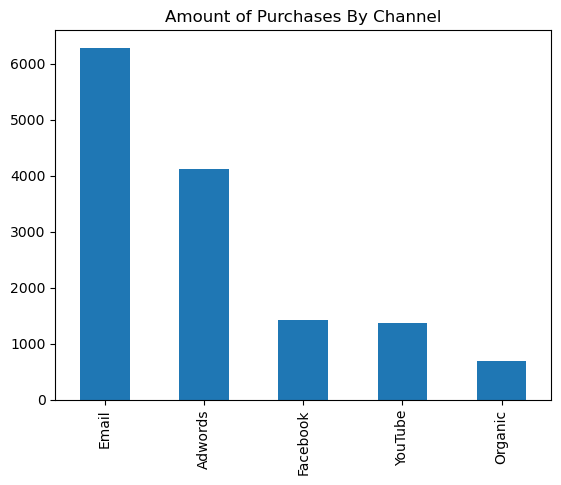

In [5]:
channel_breakdown_graph = channel_breakdown.plot.bar(x='Channel', rot=90, title='Amount of Purchases By Channel')


In [6]:
# Analyzing Different Age Groups To Put Them Into Bins
df['age'].describe()

count    13888.000000
mean        40.987471
std         16.958023
min         12.000000
25%         26.000000
50%         41.000000
75%         56.000000
max         70.000000
Name: age, dtype: float64

In [7]:
# Define bins as (0 - 25, 26 - 41, 42 - 57, 58 - 76)
bins = [0, 25, 41, 57, 76]

In [8]:
# Group Names For Bins
group_names = ["Gen Z", "Millennials", "Gen X", "Baby Boomers"]

In [9]:
# Adding New Age Bucket Column
df['age_buckets'] = pd.cut(df['age'], bins, labels=group_names)

In [10]:
df

,id,traffic_source,event_type,age,gender,country,age_buckets
0,57725,Organic,purchase,70,F,China,Baby Boomers
1,59891,Facebook,purchase,70,M,Australia,Baby Boomers
2,96333,Adwords,purchase,70,F,South Korea,Baby Boomers
3,70321,Facebook,purchase,70,M,United Kingdom,Baby Boomers
4,40955,Facebook,purchase,70,F,China,Baby Boomers
...,...,...,...,...,...,...,...
13883,28775,Facebook,purchase,12,F,China,Gen Z
13884,81826,YouTube,purchase,12,F,United States,Gen Z
13885,40076,YouTube,purchase,12,F,China,Gen Z
13886,65443,Email,purchase,12,F,China,Gen Z


In [11]:
#How Many Purchases By Age Group
for_age_bucket = df['age_buckets'].value_counts()

In [12]:
for_age_bucket

Millennials     3807
Gen X           3750
Gen Z           3283
Baby Boomers    3048
Name: age_buckets, dtype: int64

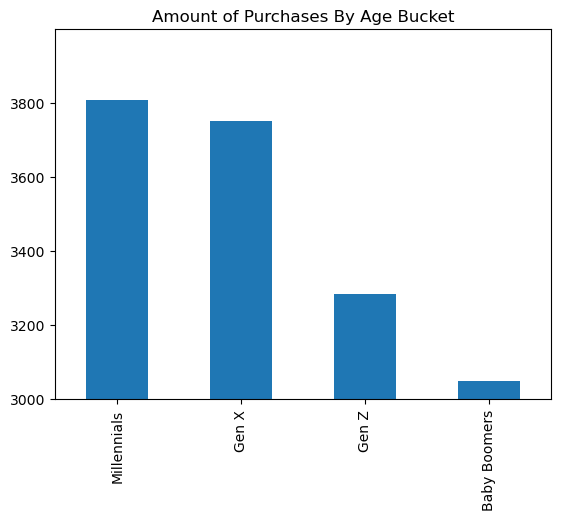

In [13]:
age_buckets_graph = for_age_bucket.plot.bar(x='age_buckets', ylim=3000, rot=90, title='Amount of Purchases By Age Bucket')


In [16]:
## Purchases Broken Down to Each Channel
age_channel = df[['age_buckets', 'traffic_source']]

In [17]:
# Adwords Analysis
adwords = age_channel[age_channel['traffic_source']=='Adwords']

In [18]:
adwords = adwords.groupby('age_buckets')['traffic_source'].count()
adwords

age_buckets
Gen Z            950
Millennials     1120
Gen X           1142
Baby Boomers     907
Name: traffic_source, dtype: int64

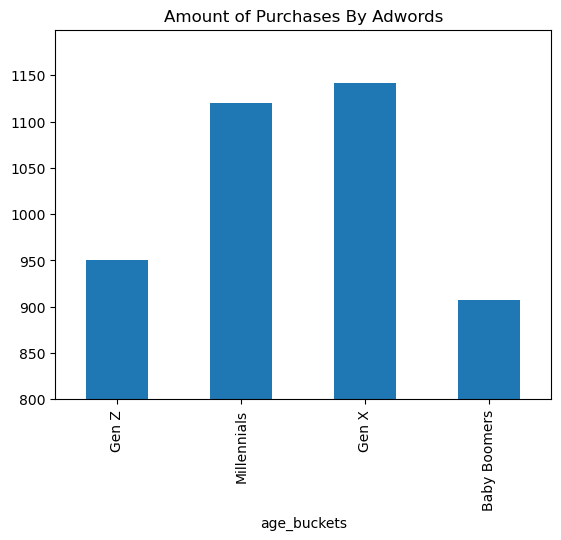

In [19]:
adwords_graph = adwords.plot.bar(x='age_buckets', ylim=800, rot=90, title='Amount of Purchases By Adwords')


In [20]:
# Email analysis 
email = age_channel[age_channel['traffic_source']=='Email']

In [21]:
email = email.groupby('age_buckets')['traffic_source'].count()
email


age_buckets
Gen Z           1455
Millennials     1782
Gen X           1684
Baby Boomers    1361
Name: traffic_source, dtype: int64

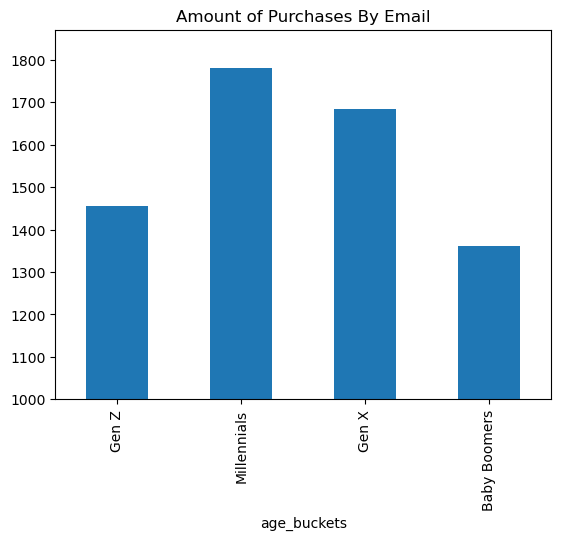

In [22]:
email_graph = email.plot.bar(x='age_buckets', ylim=1000, rot=90, title='Amount of Purchases By Email')

In [24]:
# Facebook analysis
facebook = age_channel[age_channel['traffic_source']=='Facebook']

In [25]:
facebook = facebook.groupby('age_buckets')['traffic_source'].count()
facebook

age_buckets
Gen Z           350
Millennials     376
Gen X           365
Baby Boomers    334
Name: traffic_source, dtype: int64

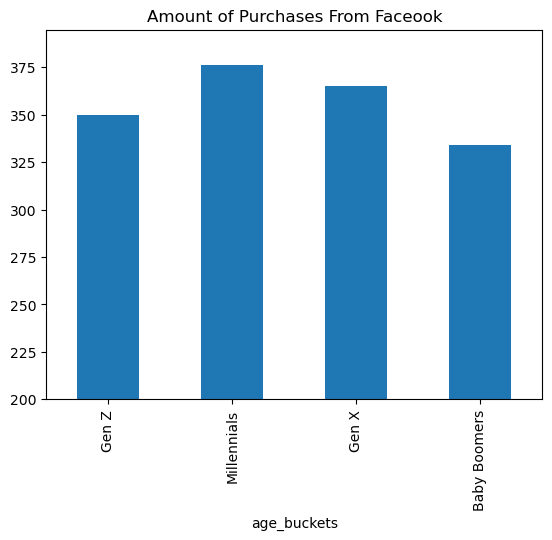

In [26]:
facebook_graph = facebook.plot.bar(x='age_buckets', ylim=200, rot=90, title='Amount of Purchases From Faceook')


In [28]:
# youtube analysis
youtube = age_channel[age_channel['traffic_source']=='YouTube']

In [29]:
youtube = youtube.groupby('age_buckets')['traffic_source'].count()
youtube

age_buckets
Gen Z           335
Millennials     354
Gen X           376
Baby Boomers    301
Name: traffic_source, dtype: int64

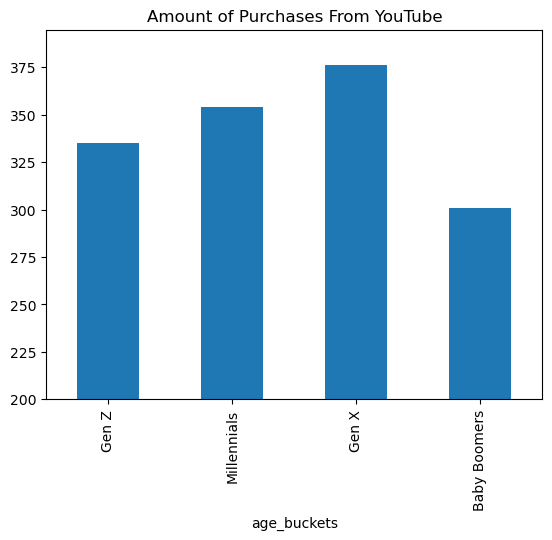

In [30]:
youtube = youtube.plot.bar(x='age_buckets', ylim=200, rot=90, title='Amount of Purchases From YouTube')

In [31]:
# Organic analysis
organic = age_channel[age_channel['traffic_source']=='Organic']

In [32]:
organic = organic.groupby('age_buckets')['traffic_source'].count()
organic

age_buckets
Gen Z           193
Millennials     175
Gen X           183
Baby Boomers    145
Name: traffic_source, dtype: int64

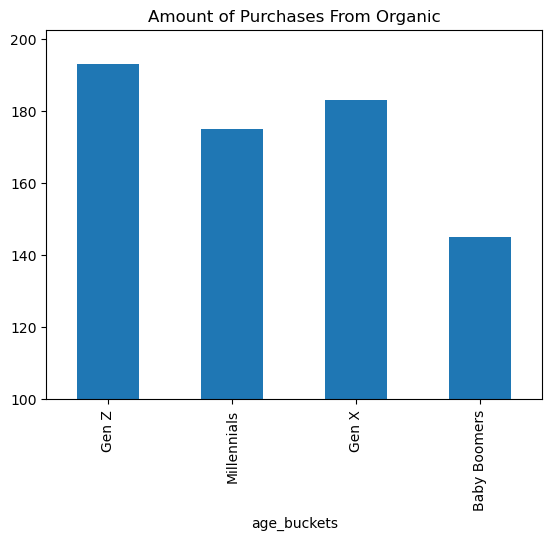

In [33]:
organic_graph = organic.plot.bar(x='age_buckets', ylim=100, rot=90, title='Amount of Purchases From Organic')

In [34]:
# Logistic regression to predict age of someone purchasing from channel

In [41]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
sklearn.set_config(print_changed_only=False)

In [42]:
## Selecting only relevant columns
df_2 = df[['traffic_source', 'age']]

In [43]:
df_2


,traffic_source,age
0,Organic,70
1,Facebook,70
2,Adwords,70
3,Facebook,70
4,Facebook,70
...,...,...
13883,Facebook,12
13884,YouTube,12
13885,YouTube,12
13886,Email,12


In [44]:
## Changing categorical variables to numbers
df_2 = pd.get_dummies(df_2)
df_2

,age,traffic_source_Adwords,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_YouTube
0,70,0,0,0,1,0
1,70,0,0,1,0,0
2,70,1,0,0,0,0
3,70,0,0,1,0,0
4,70,0,0,1,0,0
...,...,...,...,...,...,...
13883,12,0,0,1,0,0
13884,12,0,0,0,0,1
13885,12,0,0,0,0,1
13886,12,0,1,0,0,0


In [45]:
## Spliting my data for testing
X_train, X_test, y_train, y_test = train_test_split(df_2.drop('age', axis=1),df_2['age'])

In [46]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Predicting the age of someone most likely to purchase from an ad show on YouTube
model.predict(np.array([[0,0,0,0,1]]))

/Users/PKArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([64])

In [48]:
# Predicting the age of someone most likely to purchase from an ad show on Adwords
model.predict(np.array([[1,0,0,0,0]]))

/Users/PKArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([38])

In [49]:
# Predicting the age of someone most likely to purchase from an Email Ad
model.predict(np.array([[0,1,0,0,0]]))

/Users/PKArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([43])

In [50]:
# Predicting the age of someone most likely to purchase from a Facebook Ad
model.predict(np.array([[0,0,1,0,0]]))

/Users/PKArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([21])

In [51]:
# Predicting the age of someone most likely to purchase from seeing the product Organically
model.predict(np.array([[0,0,0,1,0]]))

/Users/PKArthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([25])